# Task: Location-based Analysis

In [4]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
##  there is no duplicate values and  null values
import warnings
warnings.filterwarnings("ignore")

In [6]:
#reading the data set
df = pd.read_csv('Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
#display the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Data PreProcessing

In [17]:
# Create a base map centered at the average location of the dataset
map = [df['Latitude'].mean(), df['Longitude'].mean()]
hotel_map = folium.Map(location=map, zoom_start=2)

# Prepare data for heatmap (dropping missing values)
heat_data = df[['Latitude', 'Longitude']].dropna().values.tolist()

# Add a heatmap layer
HeatMap(heat_data, radius=10).add_to(hotel_map)

# Save the map as an HTML file
map_filepath = r"D:\internship\restaurant_map.html"
hotel_map.save(map_filepath)


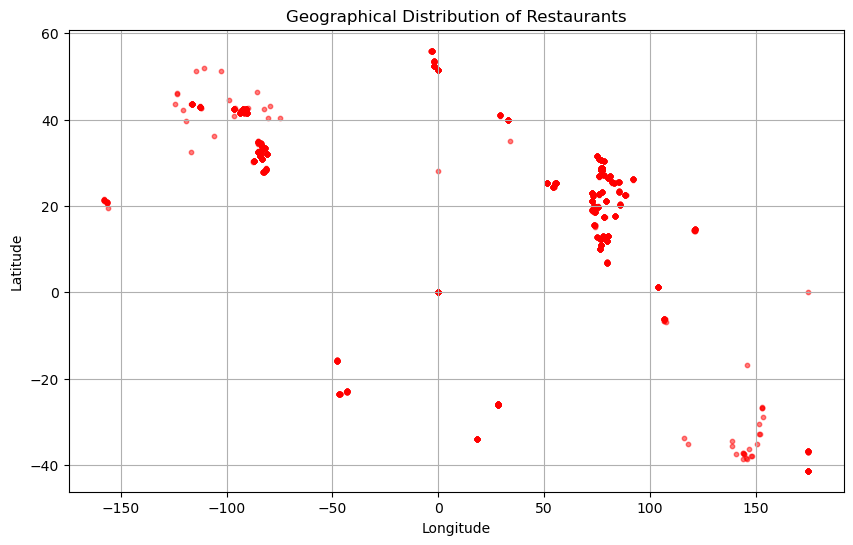

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Plot the distribution of restaurants using latitude and longitude
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

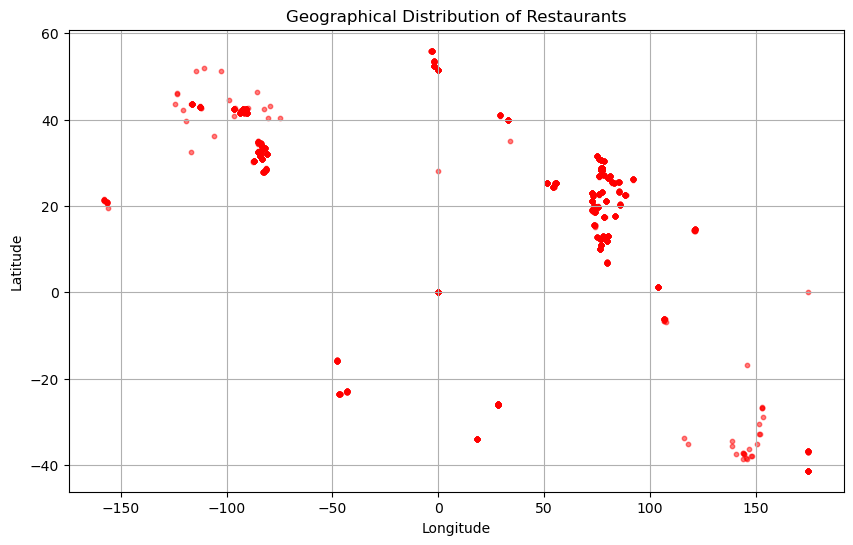

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Plot the distribution of restaurants using latitude and longitude
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

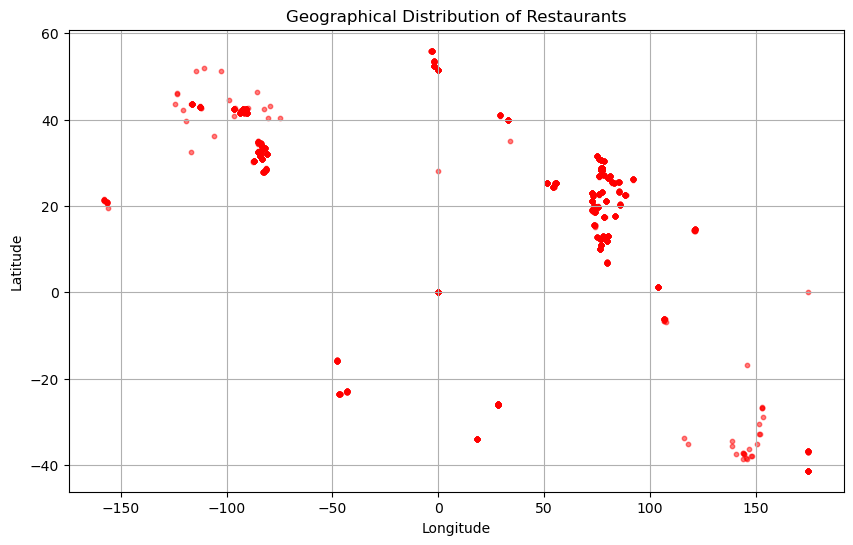

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Plot the distribution of restaurants using latitude and longitude
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

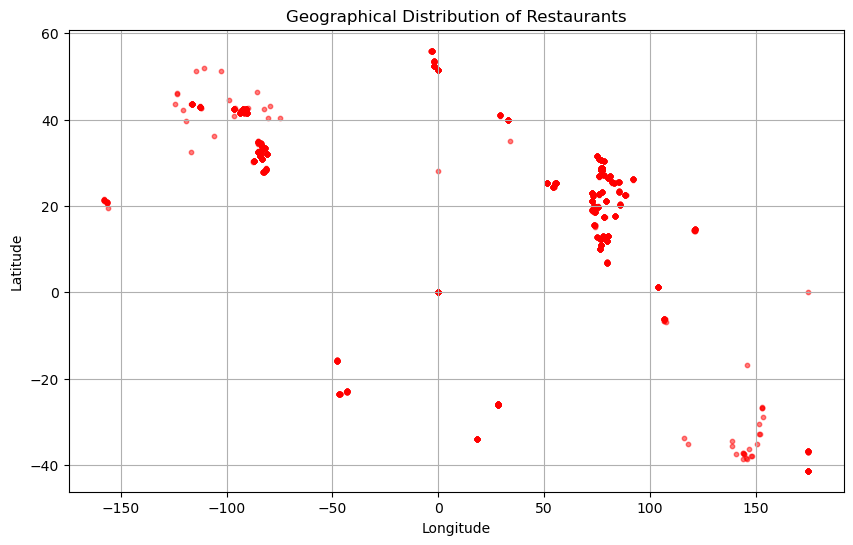

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Plot the distribution of restaurants using latitude and longitude
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

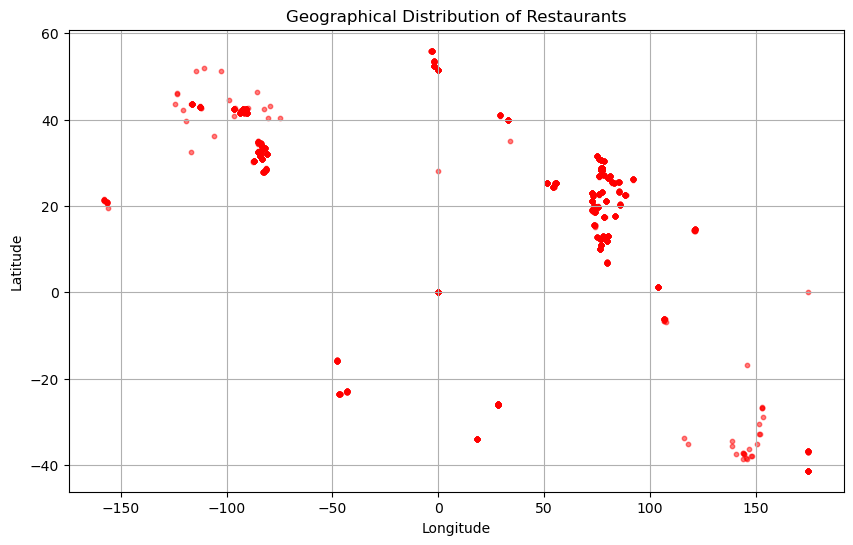

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Plot the distribution of restaurants using latitude and longitude
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

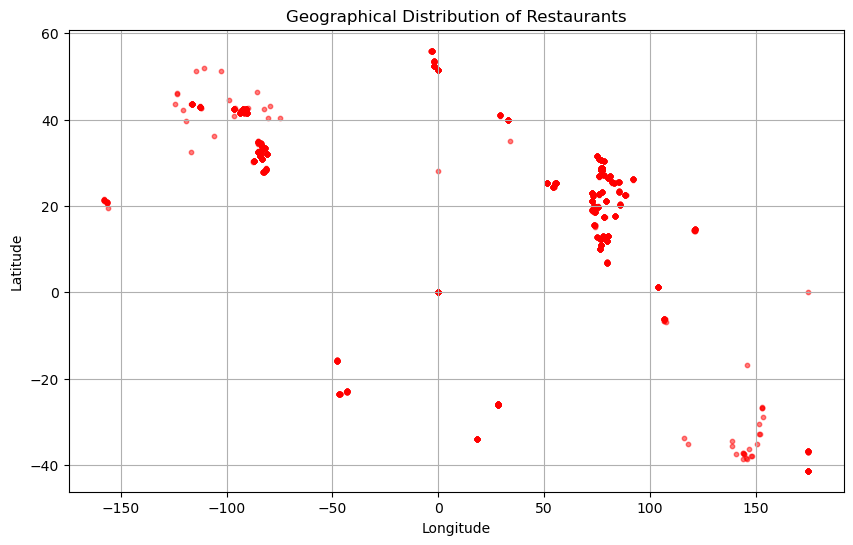

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Plot the distribution of restaurants using latitude and longitude
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

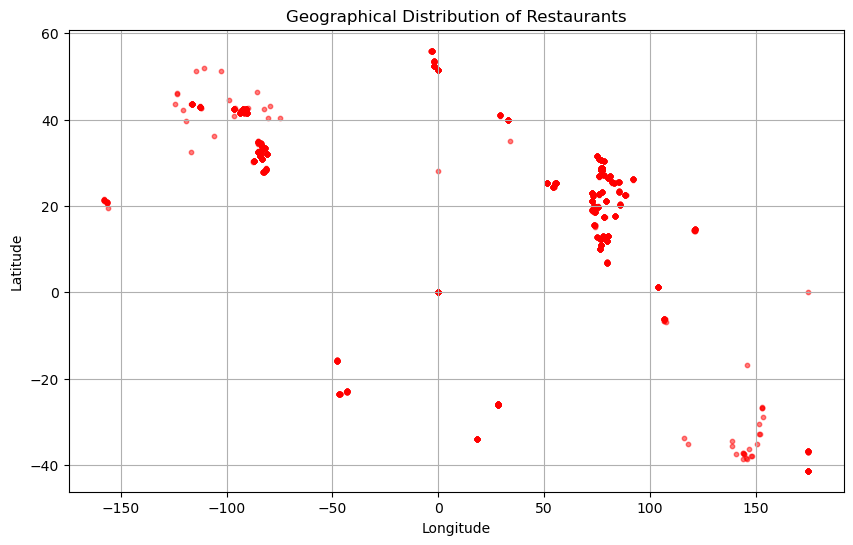

In [55]:
# Check if dataset has Latitude and Longitude columns
if "Latitude" in df.columns and "Longitude" in df.columns:

    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c="red", s=10)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Geographical Distribution of Restaurants")
    plt.grid(True)
    plt.show()
else:
    print("Error: The dataset does not contain 'Latitude' and 'Longitude' columns.")

### Grouping the restaurants by city or locality and analyze the concentration of restaurants in different areas.

In [19]:
# Group by City and count restaurants
counts_of_city = df.groupby('City').size().reset_index(name='Restaurant Count')
print(counts_of_city)

                City  Restaurant Count
0          Abu Dhabi                20
1               Agra                20
2          Ahmedabad                21
3             Albany                20
4          Allahabad                20
..               ...               ...
136          Weirton                 1
137  Wellington City                20
138   Winchester Bay                 1
139          Yorkton                 1
140        ��stanbul                14

[141 rows x 2 columns]


In [27]:
# Group by Locality and count restaurants
locality_counts = df.groupby('Locality').size().reset_index(name='Restaurant Count')
print(locality_counts)

                                 Locality  Restaurant Count
0       ILD Trade Centre Mall, Sohna Road                 2
1     12th Square Building, Banjara Hills                 1
2                   A Hotel, Gurdev Nagar                 1
3                ARSS Mall, Paschim Vihar                 1
4                              Aaya Nagar                 1
...                                   ...               ...
1203             ibis New Delhi, Aerocity                 2
1204                              �ayyolu                 1
1205                         �guas Claras                 3
1206                           �ukurambar                 1
1207                            ��mitk�_y                 1

[1208 rows x 2 columns]


In [23]:
# Sort and display the top 10 cities/localities with the most restaurants
tops_cities = counts_of_city.sort_values(by='Restaurant Count', ascending=False).head(10)
print(tops_cities)

            City  Restaurant Count
88     New Delhi              5473
50       Gurgaon              1118
89         Noida              1080
43     Faridabad               251
48     Ghaziabad                25
17  Bhubaneshwar                21
69       Lucknow                21
5       Amritsar                21
2      Ahmedabad                21
51      Guwahati                21


In [29]:
# Sort and display the top 10 cities/localities with the most restaurants
top_localities = locality_counts.sort_values(by='Restaurant Count', ascending=False).head(10)
print(top_localities)

                Locality  Restaurant Count
216      Connaught Place               122
835       Rajouri Garden                99
971             Shahdara                87
274       Defence Colony                86
639        Malviya Nagar                85
794            Pitampura                85
655  Mayur Vihar Phase 1                84
834       Rajinder Nagar                81
870           Safdarjung                80
889         Satyaniketan                79


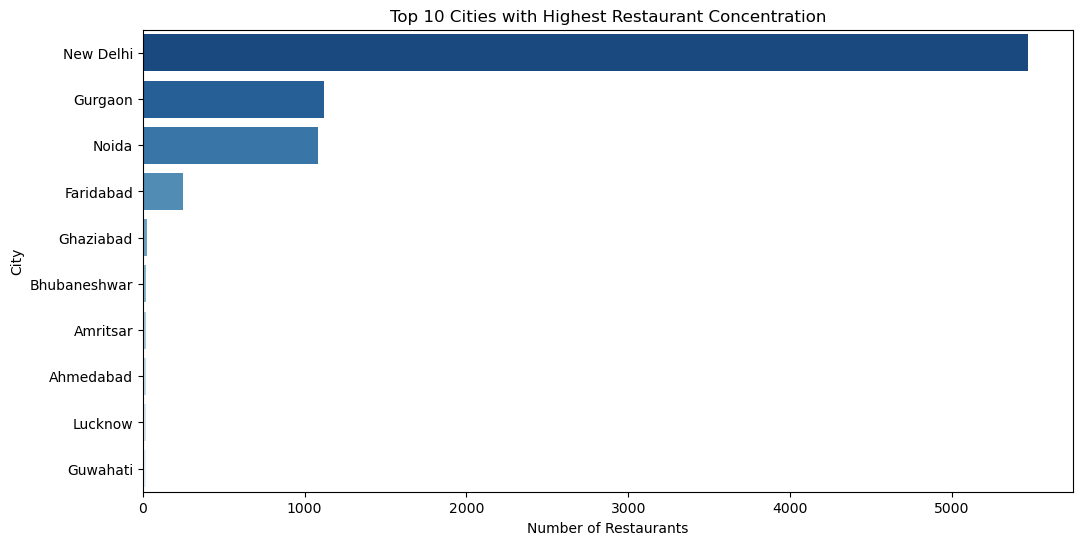

In [33]:
### 🔹 Step 1: Analyze Restaurant Concentration by City 
count_of_resturant = df["City"].value_counts().reset_index()
count_of_resturant.columns = ["City", "Number of Restaurants"]

# Plot the top 10 cities with the most restaurants
plt.figure(figsize=(12, 6))
sns.barplot(x=count_of_resturant["Number of Restaurants"].head(10), y=count_of_resturant["City"].head(10), palette="Blues_r")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest Restaurant Concentration")
plt.show()

In [37]:
# Calculate the average rating per city
averg_rating_city = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by highest rating
averg_rating_city = averg_rating_city.sort_values(by='Aggregate rating', ascending=False)

# Display the top-rated cities
averg_rating_city.head(10)


,City,Aggregate rating
56,Inner City,4.900000
107,Quezon City,4.800000
73,Makati City,4.650000
95,Pasig City,4.633333
75,Mandaluyong City,4.625000
15,Beechworth,4.600000
67,London,4.535000
123,Taguig City,4.525000
122,Tagaytay City,4.500000
116,Secunderabad,4.500000


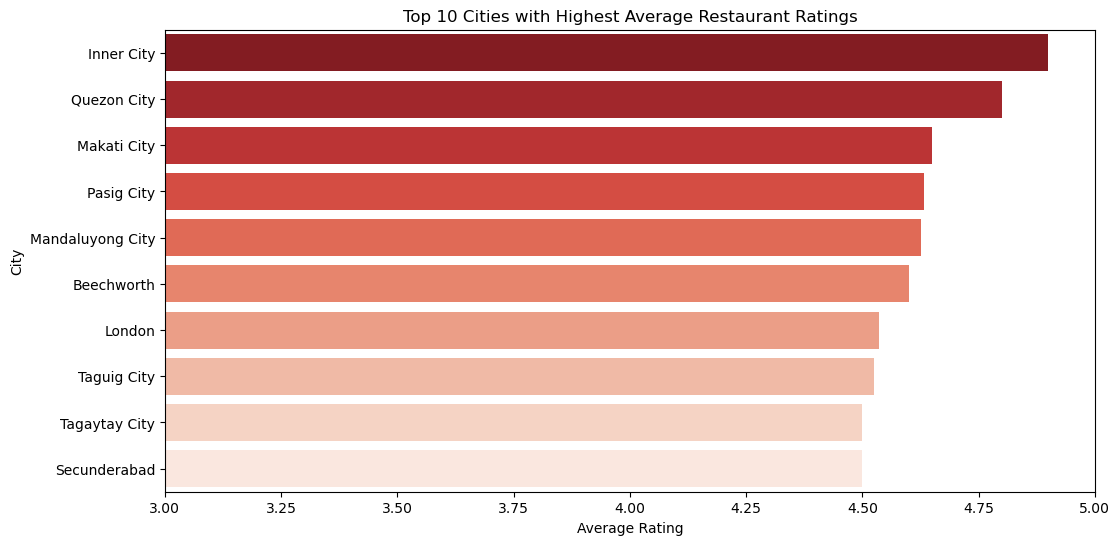

In [43]:
### 🔹 Step 2: Visualize Average Ratings Across Cities ###
averg_rating_city = df.groupby("City")["Aggregate rating"].mean().reset_index()
averg_rating_city = averg_rating_city.sort_values(by="Aggregate rating", ascending=False)

# Plot the top 10 cities with the highest average restaurant ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=averg_rating_city["Aggregate rating"].head(10), y=averg_rating_city["City"].head(10), palette="Reds_r")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.xlim(3, 5)  # Ratings usually range between 3 and 5
plt.title("Top 10 Cities with Highest Average Restaurant Ratings")
plt.show()

In [45]:
# Calculate average price range per city
averg_price_city = df.groupby('City')['Price range'].mean().reset_index()

# Sort by highest price range
averg_price_city = averg_price_city.sort_values(by='Price range', ascending=False)

# Display the most expensive cities
averg_price_city.head(10)


,City,Price range
104,Princeton,4.000000
56,Inner City,4.000000
133,Vineland Station,4.000000
60,Johannesburg,4.000000
93,Panchkula,4.000000
94,Pasay City,4.000000
97,Paynesville,4.000000
113,Sandton,3.818182
75,Mandaluyong City,3.750000
103,Pretoria,3.700000


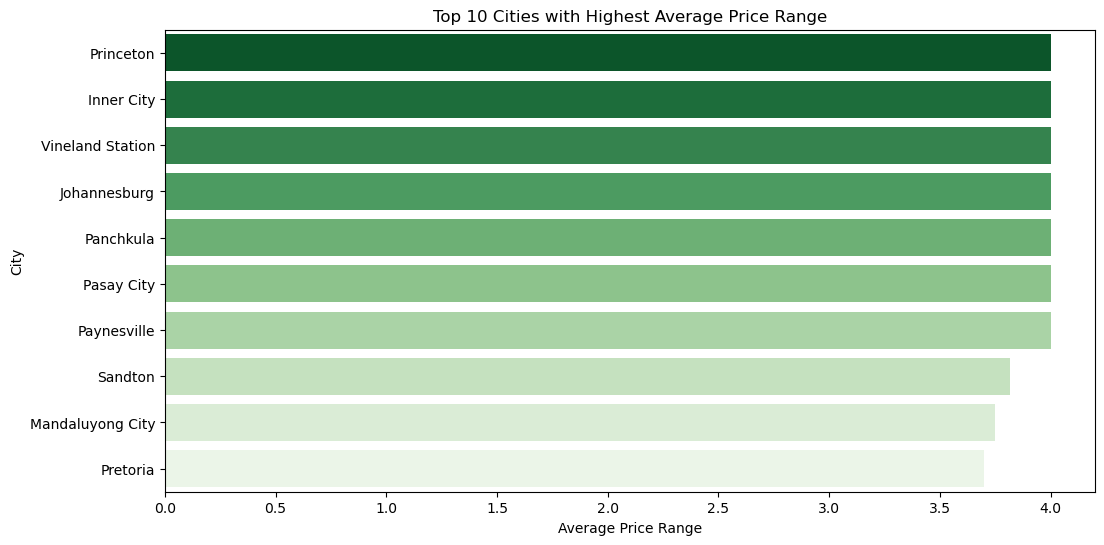

In [47]:
### 🔹 Step 3: Visualize Average Price Ranges Across Cities ###
averg_price_city = df.groupby("City")["Price range"].mean().reset_index()
averg_price_city = averg_price_city.sort_values(by="Price range", ascending=False)

# Plot the top 10 cities with the highest average price range
plt.figure(figsize=(12, 6))
sns.barplot(x=averg_price_city["Price range"].head(10), y=averg_price_city["City"].head(10), palette="Greens_r")
plt.xlabel("Average Price Range")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest Average Price Range")
plt.show()

In [51]:
# Find the most common cuisine per city
top_cuisine_city = df.groupby('City')['Cuisines'].apply(lambda x: x.mode()[0] if not x.isnull().all() else None).reset_index()

# Rename columns
top_cuisine_city.rename(columns={'Cuisines': 'Most Popular Cuisine'}, inplace=True)

# Display the top cities with their most popular cuisines
top_cuisine_city.head(10)


,City,Most Popular Cuisine
0,Abu Dhabi,American
1,Agra,"North Indian, Mughlai"
2,Ahmedabad,"Cafe, American, Continental, Armenian, Fast Food"
3,Albany,"Japanese, Steak, Sushi"
4,Allahabad,"North Indian, Chinese"
5,Amritsar,North Indian
6,Ankara,"Kebab, Turkish Pizza"
7,Armidale,"Bar Food, Steak"
8,Athens,"American, Italian, Pizza"
9,Auckland,Cafe


In [53]:
# Merge all computed statistics into one dataframe
city_stat = averg_rating_city.merge(averg_price_city, on='City').merge(top_cuisine_city, on='City')

# Rename columns for clarity
city_stat.rename(columns={
    'Aggregate rating': 'Avg Rating',
    'Price range': 'Avg Price Range'
}, inplace=True)

# Display the final summary of top cities
city_stat.head(10)


,City,Avg Rating,Avg Price Range,Most Popular Cuisine
0,Inner City,4.900000,4.00,"European, Contemporary"
1,Quezon City,4.800000,3.00,"Filipino, Mexican"
2,Makati City,4.650000,3.00,"French, Japanese, Desserts"
3,Pasig City,4.633333,3.00,"American, Ice Cream, Desserts"
4,Mandaluyong City,4.625000,3.75,Chinese
5,Beechworth,4.600000,2.00,"Pizza, Bar Food"
6,London,4.535000,3.00,"American, Burger"
7,Taguig City,4.525000,3.50,"American, Asian, Italian, Seafood"
8,Tagaytay City,4.500000,3.00,Filipino
9,Secunderabad,4.500000,2.00,"Cafe, Continental"
